In [76]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-26 13:21:17,230: Credentials are already in use. The existing account in the session will be replaced.


In [77]:
from qiskit.visualization import plot_histogram
from numpy import random


In [78]:
# the database
color_codes = [0,1,2,3]
random.shuffle(color_codes)
database = {}
for i in range(4):
    database[i] = color_codes[i]

In [79]:
print(database)

{0: 0, 1: 2, 2: 1, 3: 3}


In [80]:
# the color code we are looking for, like we are looking for orange-10
desired_color_code = 2

In [81]:
#this oracle has the data base
DB = QuantumCircuit(5)

In [82]:
def DB_function(QC, color_code):
    if color_code == 1:
        QC.ccx(0,1,3)
    elif color_code == 2:
        QC.ccx(0,1,2)
    elif color_code == 3:
        QC.ccx(0,1,3)
        QC.ccx(0,1,2)
        

In [95]:
DB.x(0)
DB.x(1)
DB_function(DB,database[0])
DB.x(0)
DB.x(1)
DB.barrier()
DB.x(0)
#DB.x(1)
DB_function(DB,database[1])
DB.x(0)
#DB.x(1)
DB.barrier()

#DB.x(0)
DB.x(1)
DB_function(DB,database[2])
#DB.x(0)
DB.x(1)
DB.barrier()

DB_function(DB,database[3])
DB.barrier()

In [96]:
MG = QuantumCircuit(5)
if desired_color_code == 0:
    MG.x(2)
    MG.x(3)
    MG.ccx(2,3,4)
    MG.x(2)
    MG.x(3)
elif desired_color_code == 1:
    MG.x(2)
    MG.ccx(2,3,4)
    MG.x(2)
elif desired_color_code == 2:
    MG.x(3)
    MG.ccx(2,3,4)
    MG.x(3)
elif desired_color_code == 3:
    MG.ccx(2,3,4)
    
MG.barrier()

In [85]:
oracle = QuantumCircuit(5)
oracle = oracle + DB+MG +DB

In [97]:
phase = QuantumCircuit(5)
phase.x(0)
phase.x(1)
phase.h(1)
phase.cx(0,1)
phase.h(1)
phase.x(0)
phase.x(1)


phase.barrier()

In [98]:
Grover = QuantumCircuit(5)
Grover = Grover + oracle
Grover.h(0)
Grover.h(1)

Grover = Grover+phase

Grover.h(0)
Grover.h(1)
Grover.barrier()

In [100]:
circuit = QuantumCircuit(5,2)

In [101]:
circuit.x(4)
circuit.h(0)
circuit.h(1)
circuit.h(4)
circuit = circuit+ Grover
circuit.measure(0,1)
circuit.measure(1,0)

In [102]:
sim = Aer.get_backend('qasm_simulator')
results = execute(circuit,sim,shots=1000)
counts = results.result().get_counts()

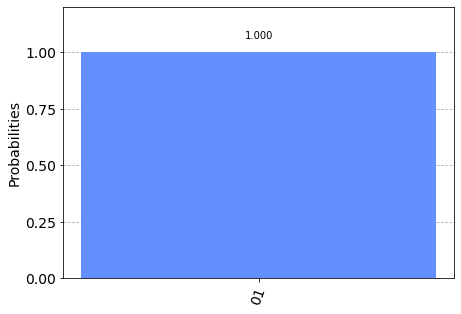

In [103]:
plot_histogram(counts)

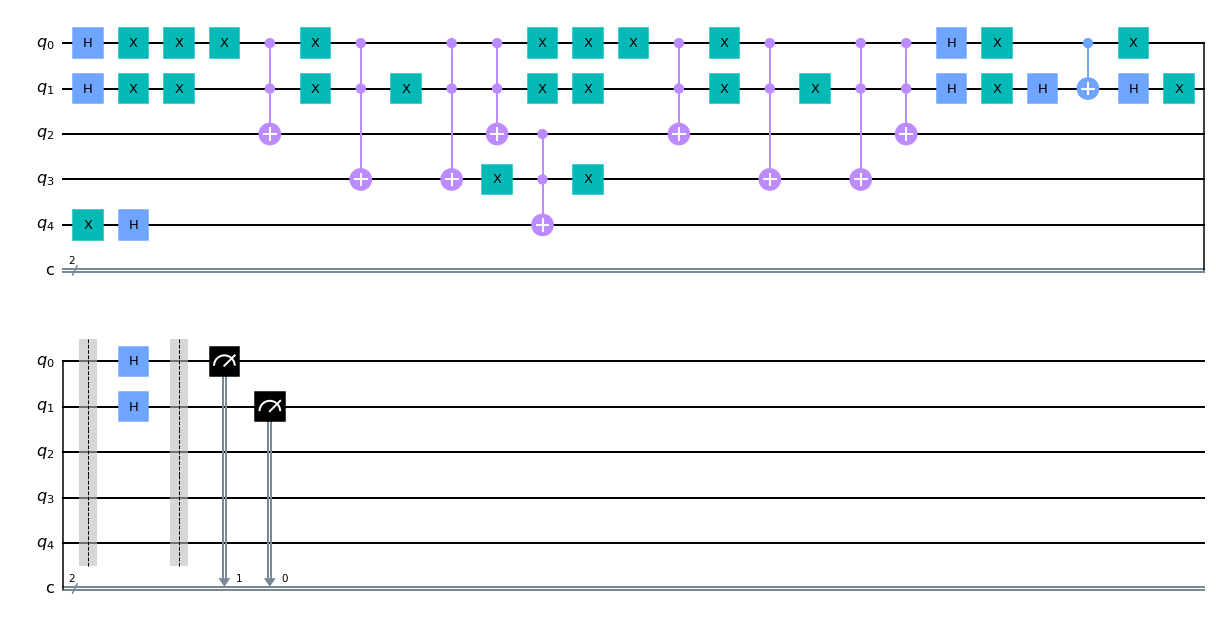

In [104]:
display(circuit.draw('mpl'))   